# Customer segmentation and classification
_Cong Tung Nguyen (May 2021)_ 
<br>
----

This notebook's purpose is to develop a customer segmentation model to define a marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. After the segmentation, I created several classification models for the clusters. I tried to analyze the data in respect of the CRISP-DM methodology. The last phase of the CRISP-DM model is the deployment, which is not within the scope of this project, however, I will mention a few ideas on how to deploy this project in production.
<br>
----

**Table of Contents:**

**1. Business Understanding**

**2. Data Understanding**

**3. Data preparation**
- 3.1 Importing the libraries and dataset
- 3.2 Exploratory Data Analysis

**4. Modeling and Evaulation**
- 4.1 Applying k-Means algorithm
    * 4.1.1 The elbow method
    * 4.1.2 Silhouette score
    * 4.1.3 Principal Component Analysis
    * 4.1.4 DataFrame with the clusters
    
    
- 4.2 Classification of customers
    * 4.2.1 Support Vector Machine Classifier
    * 4.2.2 Logistic regression
    * 4.2.3 k-Nearest Neighbors
    * 4.2.4 Decision Tree
    * 4.2.5 Random Forest
    * 4.2.6 XGBoost
    * 4.2.7 Voting Classifier

**5. Deployment**

----

## 1. Business Understanding
----

Nowadays clustering is crucial for marketers. Clustering will reveal an astonishing level of nuances that allow marketers to identify groups of like-minded people within their customer base. It unlocks profound insights that can’t be seen when looking at customers as a whole.

The deep customer understandings that result from clustering can (and should) inform every task a brand engages in, from product development and merchandising to message development, promotions and targeting. More than that, clustering enables a company to view its business from the lens of its customers, rather than its products. That’s game-changing.

## 2. Data Understanding
----

This dataset is from kaggle.com. The dataset has 18 columns, which are the following:

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

## 3. Data Preparation
----

### 3.1 Importing the libraries and dataset

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import itertools
import graphviz
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, accuracy_score
import warnings
import joblib
import pickle
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./dataset/customer_dataset.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# DataFrame dimension
print('Data dimension: ', df.shape)
print('Data size: ', df.size)
print('Number of row: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Data dimension:  (8950, 18)
Data size:  161100
Number of row:  8950
Number of columns:  18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 3.2 Exploratory Data Analysis

<AxesSubplot:>

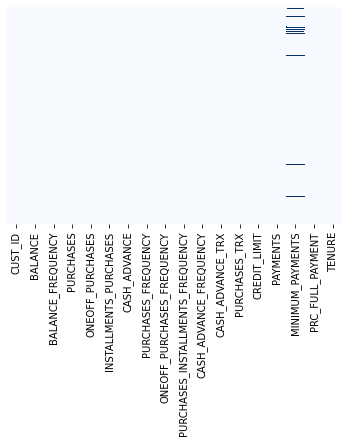

In [6]:
# Checking the null values (1)
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'Blues')

In [7]:
# Creating a dataframe to check the null values (2)
df_info = pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Number of NULL values'})
df_info = df_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'Number of null values (%)'}))
df_info

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Number of NULL values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,313.000000,0.0,0.0
Number of null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011173,0.0,3.497207,0.0,0.0


In [8]:
# Checking null values (3)
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Handling missing values

#1. MINIMUM PAYMENTS
temp_array = np.array(df['MINIMUM_PAYMENTS']).reshape(-1,1)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
temp_array = imputer.fit_transform(temp_array)

df['MINIMUM_PAYMENTS'] = pd.Series(temp_array.reshape(-1))

#2. CREDIT_LIMIT only 1 NA
df.loc[df['CREDIT_LIMIT'].isnull(), ['CREDIT_LIMIT']] = df['CREDIT_LIMIT'].mean()

In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
# Checking duplicate values in the dataset
df.duplicated().sum()

0

In [12]:
# We dont need the customer ID for segmentation
df.drop(['CUST_ID'],axis=1,inplace=True)

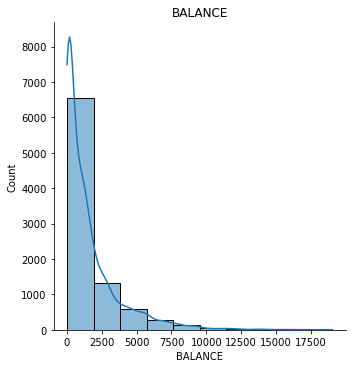

<Figure size 1296x432 with 0 Axes>

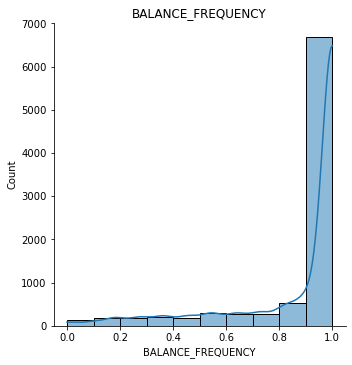

<Figure size 1296x432 with 0 Axes>

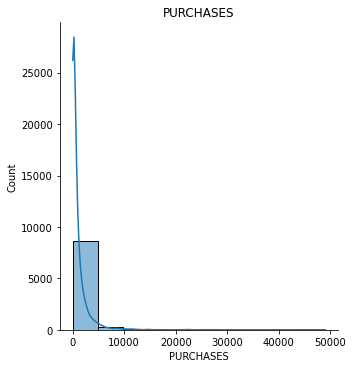

<Figure size 1296x432 with 0 Axes>

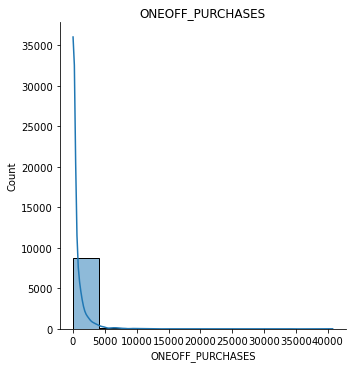

<Figure size 1296x432 with 0 Axes>

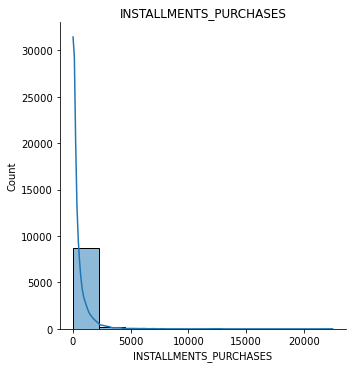

<Figure size 1296x432 with 0 Axes>

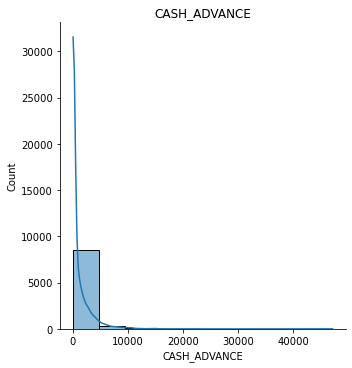

<Figure size 1296x432 with 0 Axes>

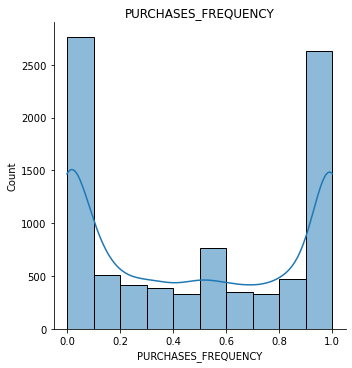

<Figure size 1296x432 with 0 Axes>

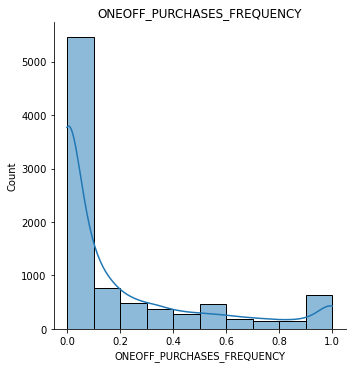

<Figure size 1296x432 with 0 Axes>

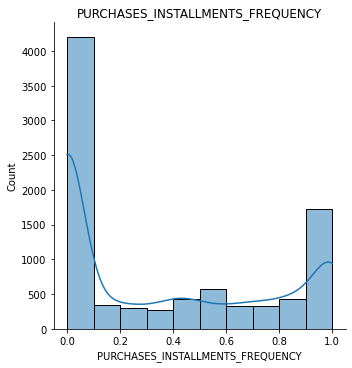

<Figure size 1296x432 with 0 Axes>

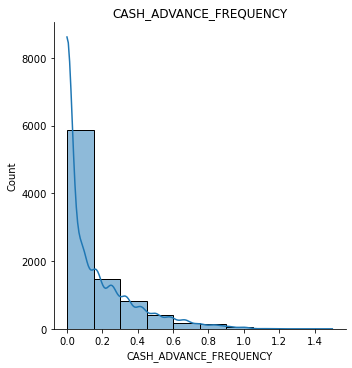

<Figure size 1296x432 with 0 Axes>

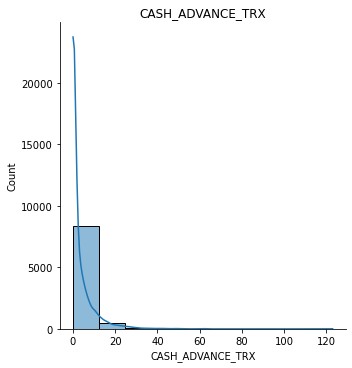

<Figure size 1296x432 with 0 Axes>

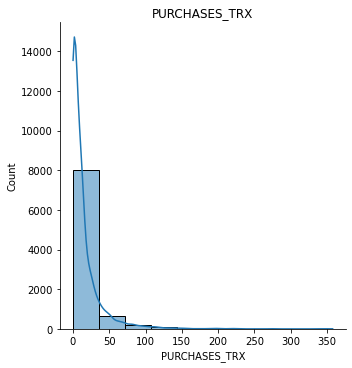

<Figure size 1296x432 with 0 Axes>

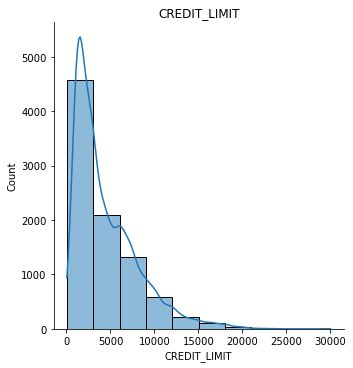

<Figure size 1296x432 with 0 Axes>

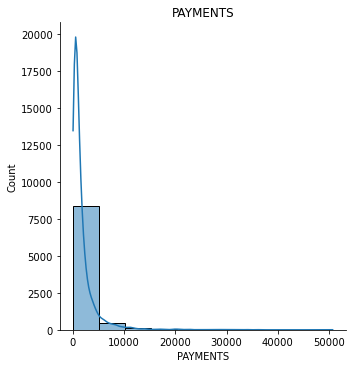

<Figure size 1296x432 with 0 Axes>

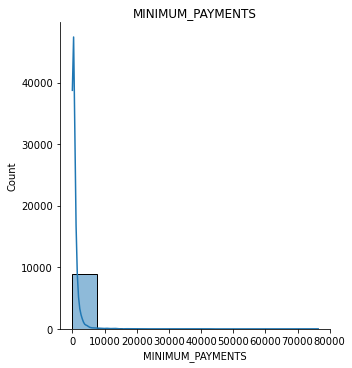

<Figure size 1296x432 with 0 Axes>

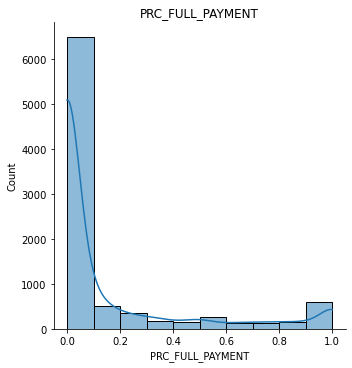

<Figure size 1296x432 with 0 Axes>

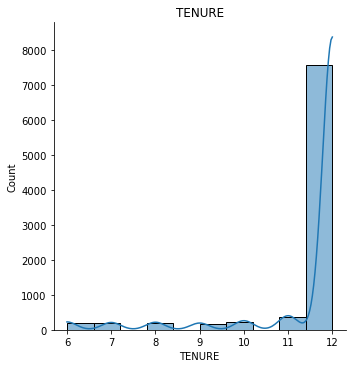

<Figure size 1296x432 with 0 Axes>

In [13]:
# KDE plot
for i in df.columns:
    sns.displot(df[i], kde=True, bins=10)
    plt.title(i)
    plt.figure(figsize=(18,6))
    plt.show()

We can see from the KDE plots, that most of the variables are either left, or right skewed.

Text(0.5, 1.0, 'Correlation matrix')

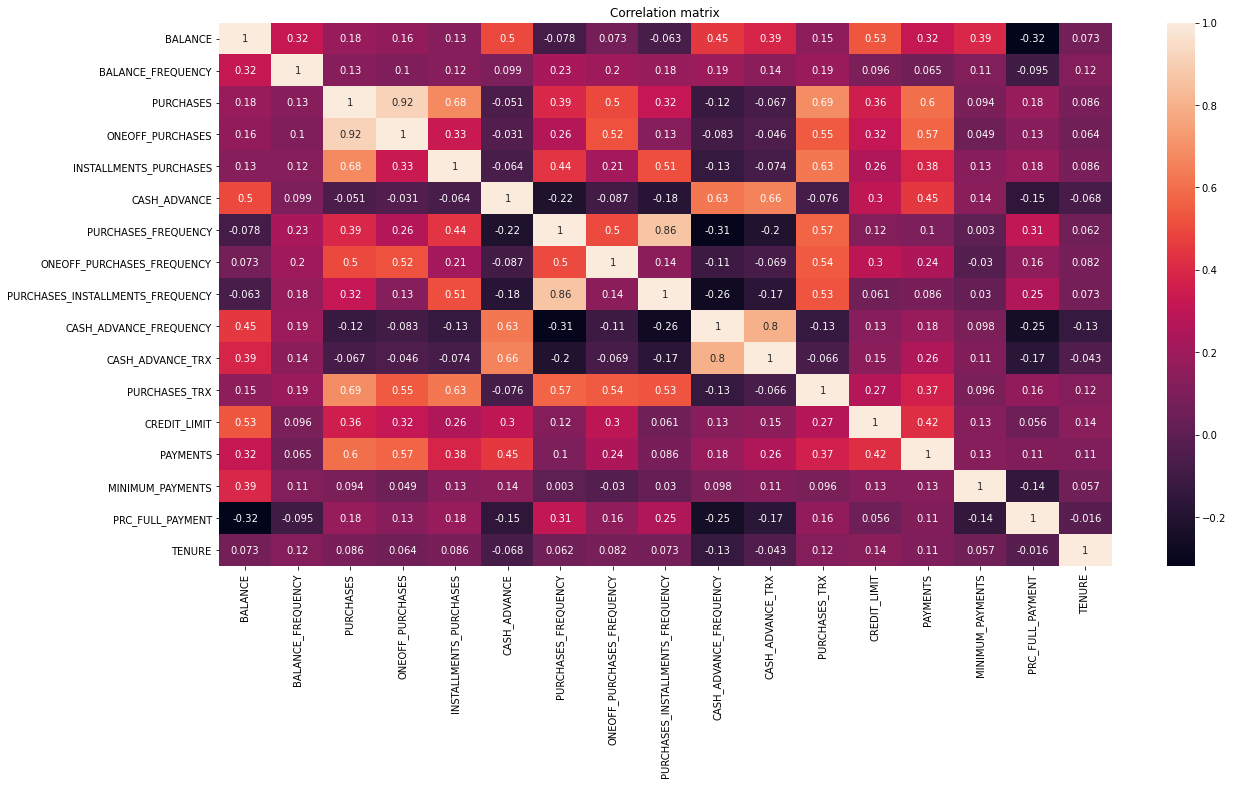

In [14]:
# Correlation matrix

corrs = df.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrs, annot = True)
plt.title('Correlation matrix')

We can see that most of the variables are not correlated with each other. <br>
It is good for us, because in supervised learning the stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

## 4. Modelling and Evaulation
----

### 4.1 Applying k-Means unsupervised algorithm

#### 4.1.1 The elbow method

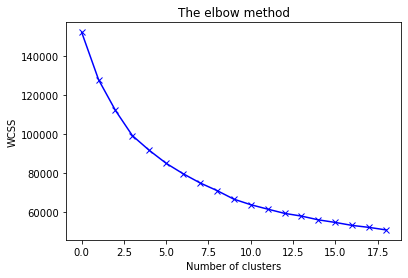

In [15]:
# The elbow method to find out the optimal number of clusters

# Scale the data at first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Calculating wcss for each cluster number
wcss = []

for i in range(1,20):
    cluster = KMeans(n_clusters=i, init='k-means++')
    cluster.fit(df_scaled)
    wcss.append(cluster.inertia_)

plt.plot(wcss,'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow method we can see that the optimal number of cluster is around 5.-7.

#### 4.1.2 Silhouette score

In [16]:
# Checking the silhouette score
for n_clusters in range(3,15):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(df_scaled)
    clusters = kmeans.predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.2497281733654333
For n_clusters = 4 The average silhouette_score is : 0.1976074492720698
For n_clusters = 5 The average silhouette_score is : 0.192943420822864
For n_clusters = 6 The average silhouette_score is : 0.20264353591238074
For n_clusters = 7 The average silhouette_score is : 0.2150470335815949
For n_clusters = 8 The average silhouette_score is : 0.2219246692389363
For n_clusters = 9 The average silhouette_score is : 0.22609147654724493
For n_clusters = 10 The average silhouette_score is : 0.22096065984341776
For n_clusters = 11 The average silhouette_score is : 0.21901115846148902
For n_clusters = 12 The average silhouette_score is : 0.21685849424075032
For n_clusters = 13 The average silhouette_score is : 0.21894938978733774
For n_clusters = 14 The average silhouette_score is : 0.19537793343986865


From the silhoette score, we can see that the cluster 5,6,7 is almost identical, a significance difference is not existing. Next, I will check the number of elements in every class for each cluster. I will choose the most balanced cluster set.

In [17]:
# Checking, whether the specific cluster is imbalance or not.
kmeans = KMeans(init='k-means++', n_clusters = 5)
kmeans.fit(df_scaled)
clusters = kmeans.predict(df_scaled)
series1 = pd.Series(clusters, name='Cluster_No_5').value_counts()

kmeans = KMeans(init='k-means++', n_clusters = 6)
kmeans.fit(df_scaled)
clusters = kmeans.predict(df_scaled)
series2 = pd.Series(clusters, name='Cluster_No_6').value_counts()

kmeans = KMeans(init='k-means++', n_clusters = 7)
kmeans.fit(df_scaled)
clusters = kmeans.predict(df_scaled)
series3 = pd.Series(clusters, name='Cluster_No_7').value_counts()

df_balance = pd.concat([series1,series2,series3],axis=1)
df_balance

,Cluster_No_5,Cluster_No_6,Cluster_No_7
0,1385.0,2231.0,2842
1,1152.0,1311.0,2045
2,3914.0,968.0,629
3,2414.0,86.0,1268
4,85.0,3039.0,894
5,NaN,1315.0,1186
6,NaN,NaN,86


From this, the cluster number 6 seems to be the most balanced cluster number.

In order to have an insight on the quality of the classification, we can represent the silhouette scores of each element of the different clusters. This is the purpose of the next figure which is taken from the [sklearn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html):

In [18]:
# Setting the cluster number to 6

n_clusters = 6
kmeans = KMeans(init='k-means++', n_clusters = n_clusters)
kmeans.fit(df_scaled)
clusters = kmeans.predict(df_scaled)

In [19]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

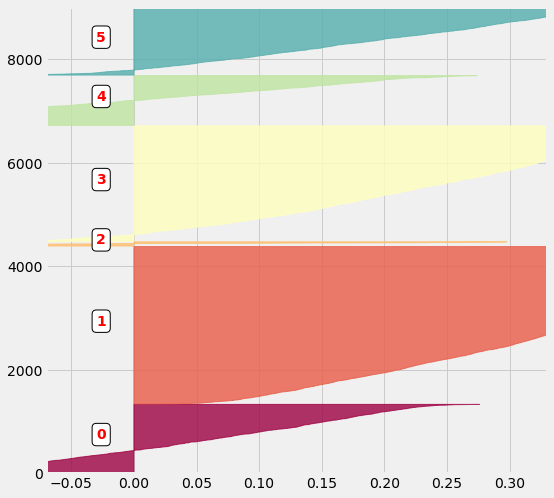

In [20]:
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(df_scaled, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(df_scaled), sample_silhouette_values, clusters)

#### 4.1.3 Principal Component Analysis

In order to ensure that these clusters are truly distinct, I check the significance of each component by performing a PCA.

In [21]:
pca = PCA()
pca.fit(df_scaled)
pca_samples = pca.transform(df_scaled)

and then check for the amount of variance explained by each component:

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


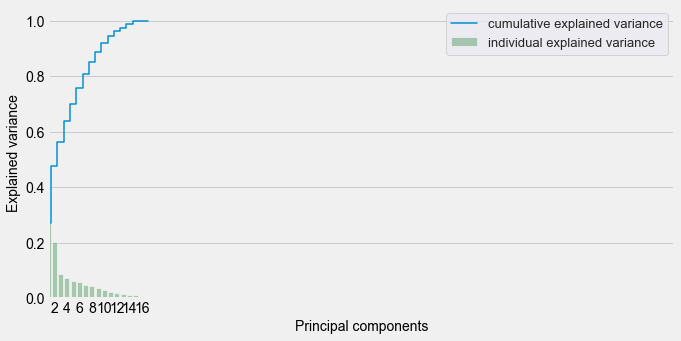

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale=1)
plt.step(range(df_scaled.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,df_scaled.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc=0, fontsize = 13);

We see that the number of components required to explain the data is extremely important: we need approximately 10 components to explain 90% of the variance of the data. 

#### 4.1.4 DataFrame with the clusters

In [23]:
# Creating a dataframe of cluster centroids
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.137676,0.427207,0.926437,0.877387,0.578596,-0.309096,1.087856,1.838892,0.542908,-0.405671,-0.318458,1.184038,0.692399,0.380207,-0.024143,0.435885,0.271440
1,-0.009933,0.371523,-0.345324,-0.223846,-0.405168,-0.079690,-0.827081,-0.335722,-0.771364,0.133708,-0.026976,-0.470838,-0.331128,-0.261276,-0.030863,-0.450686,-0.009380
2,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171463,4.847281,1.104788,0.830765,0.333341
3,-0.396973,0.308417,-0.067692,-0.244943,0.289914,-0.366855,0.964074,-0.376709,1.138871,-0.464093,-0.358684,0.121895,-0.329992,-0.252203,-0.054835,0.339921,-0.024993
4,1.593976,0.376703,-0.203632,-0.148350,-0.209035,1.951228,-0.447889,-0.182660,-0.405298,1.902600,1.858431,-0.243292,0.962441,0.778432,0.513688,-0.391156,-0.090779
5,-0.698083,-2.121957,-0.312918,-0.230918,-0.315553,-0.307848,-0.559532,-0.418507,-0.464719,-0.485688,-0.359177,-0.425619,-0.209070,-0.221225,-0.256096,0.262172,-0.164101


In [24]:
# Inverse transforming the normalized values
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1851.036530,0.978472,2982.551670,2048.720612,934.284573,330.682005,0.926960,0.751035,0.580203,0.053965,1.075586,44.140590,7013.678967,2833.805467,807.943042,0.281204,11.880574
1,1543.800519,0.965281,265.415741,220.899563,44.678807,811.758477,0.158403,0.102305,0.057878,0.161901,3.064739,3.006572,3289.670282,976.773994,792.281964,0.021897,11.504765
2,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415
3,738.209001,0.950332,858.580421,185.882025,673.233020,209.559774,0.877280,0.090078,0.817054,0.042274,0.801075,17.739695,3293.803854,1003.041435,736.416447,0.253136,11.483871
4,4882.202197,0.966508,568.141167,346.207302,222.039771,5070.688182,0.310591,0.147967,0.203361,0.515874,15.931250,8.662500,7996.202652,3986.628581,2061.334292,0.039308,11.395833
5,111.473046,0.374599,334.650267,209.160008,125.716824,333.299755,0.265783,0.077609,0.179746,0.037953,0.797710,4.130534,3733.766331,1092.719604,267.386388,0.230395,11.297710


In [25]:
# Creating the dataframe with the clusters
df = pd.concat([df,pd.DataFrame({'CLUSTER':clusters})],axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


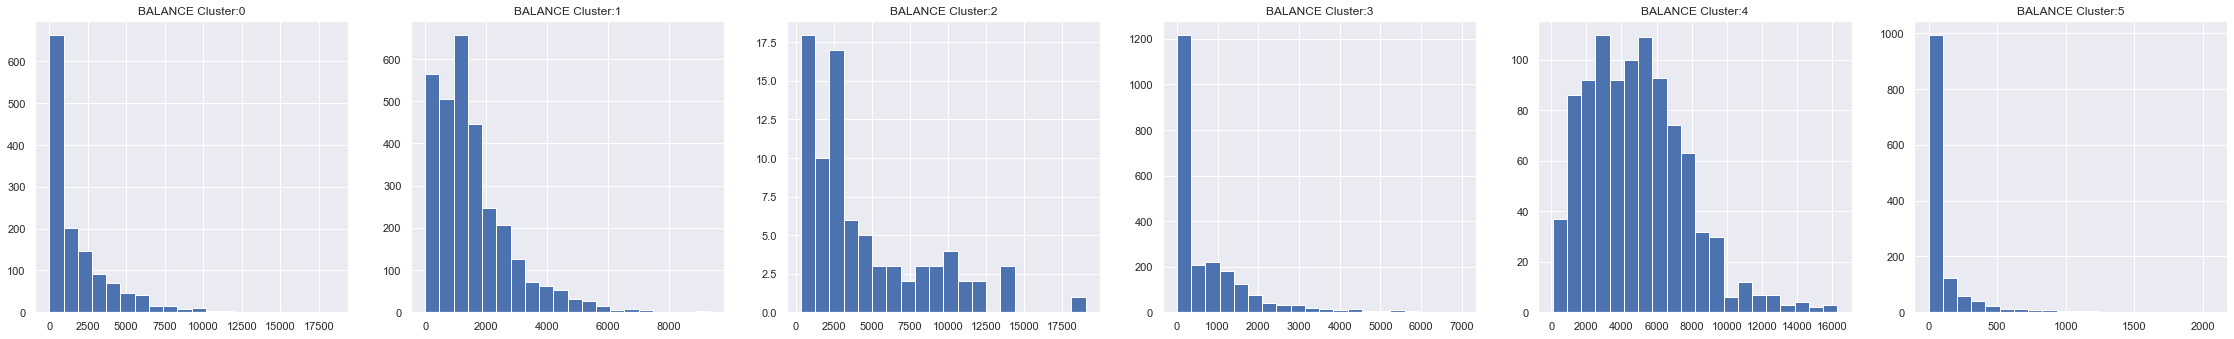

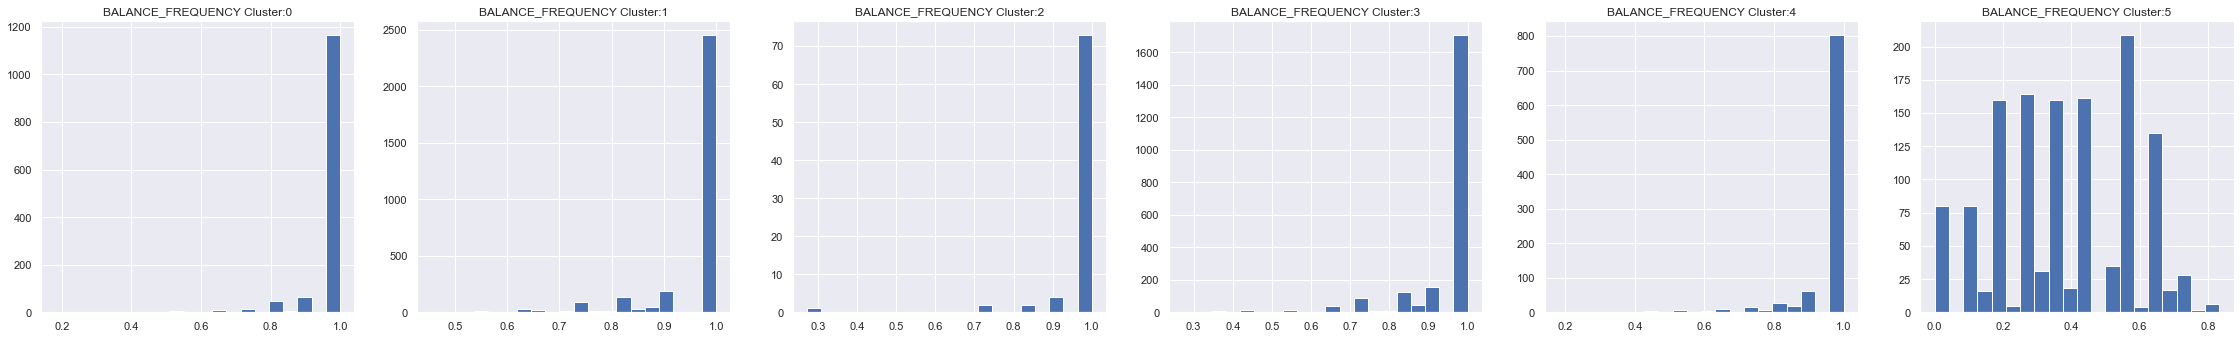

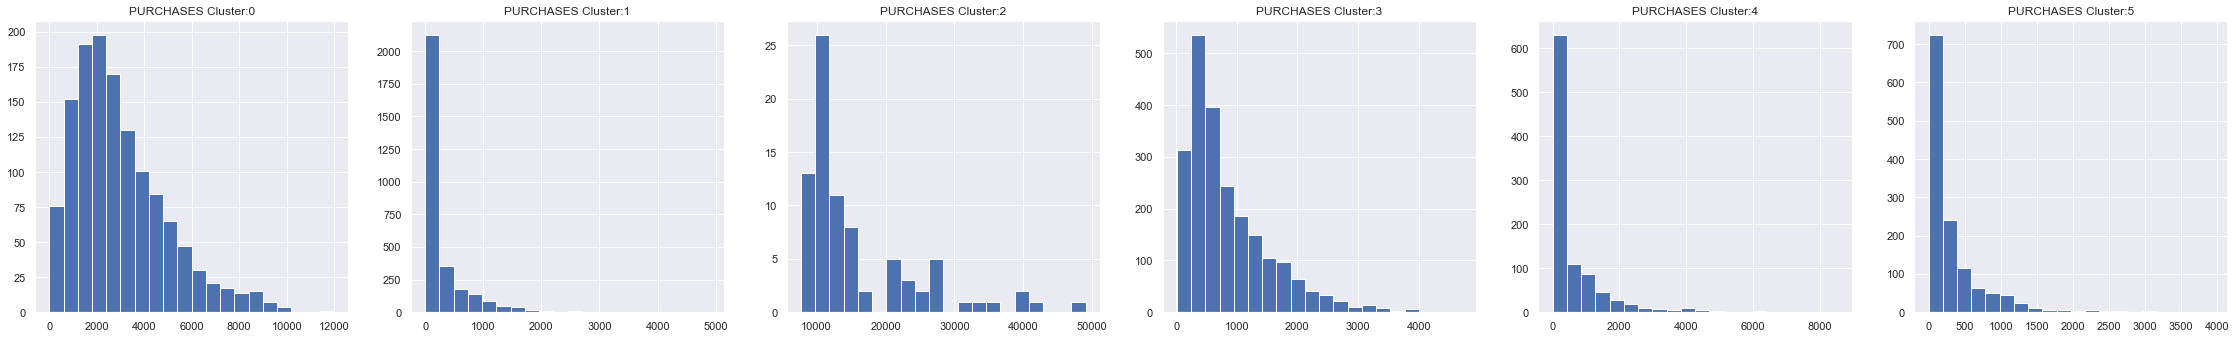

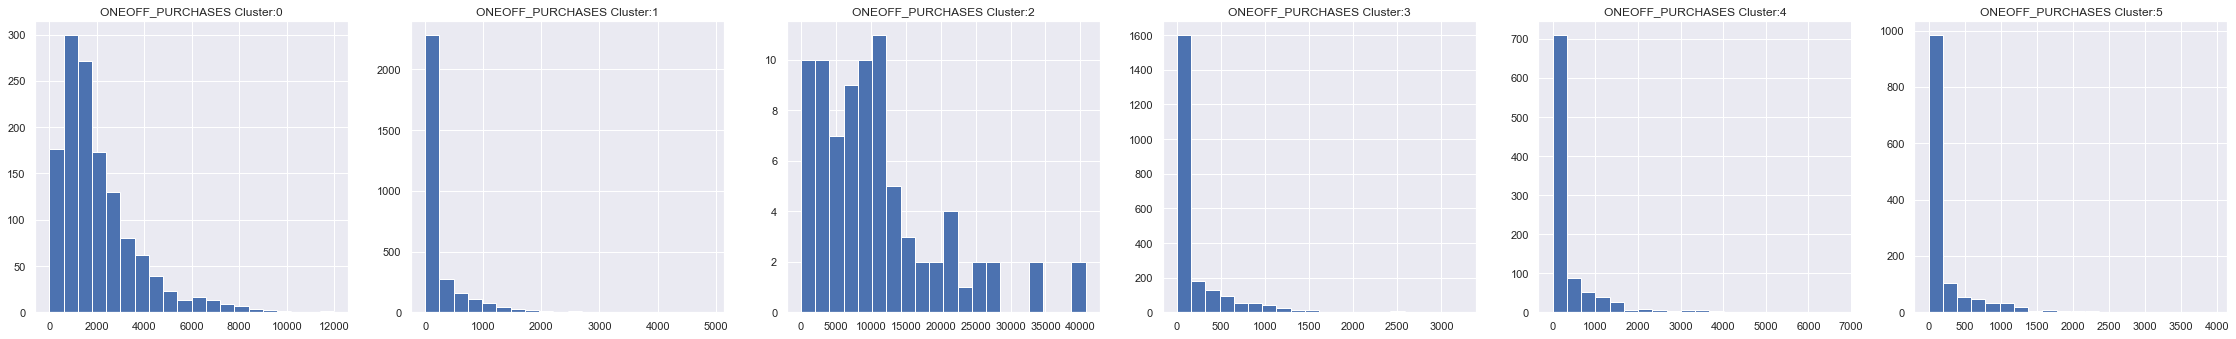

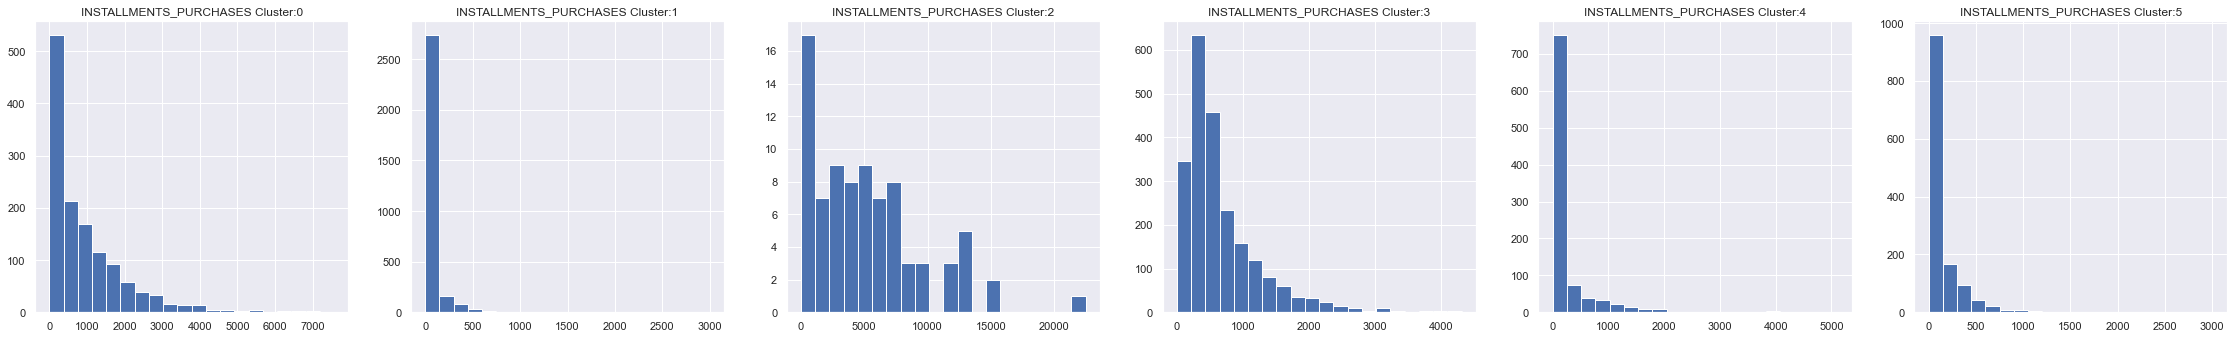

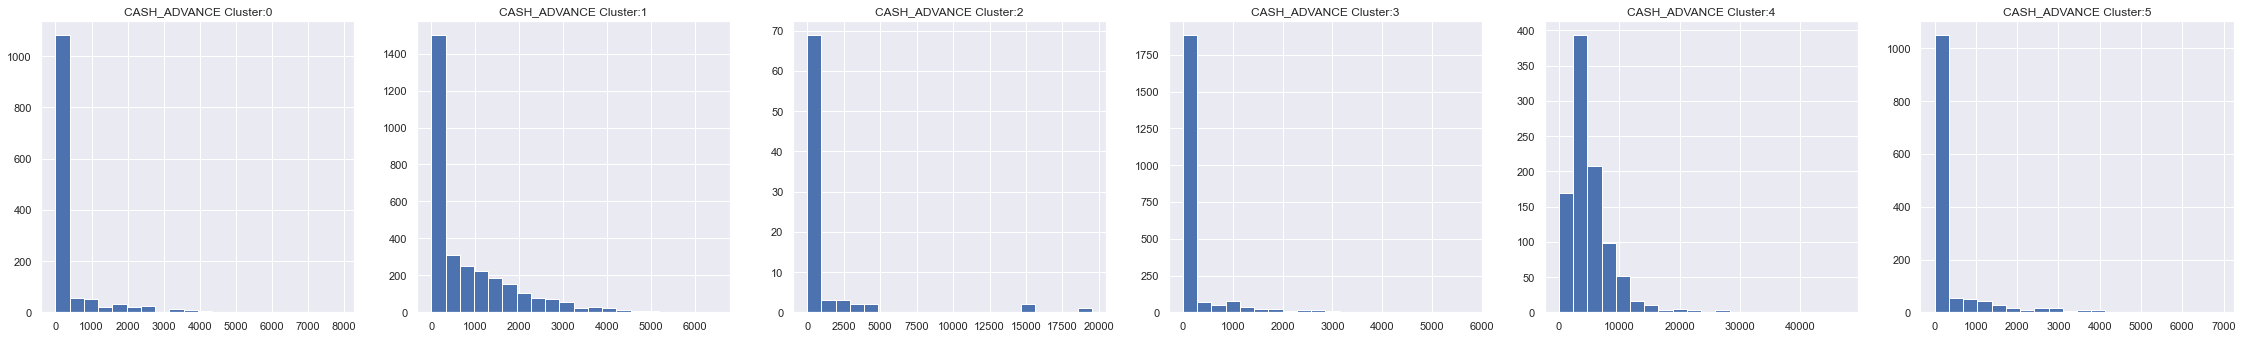

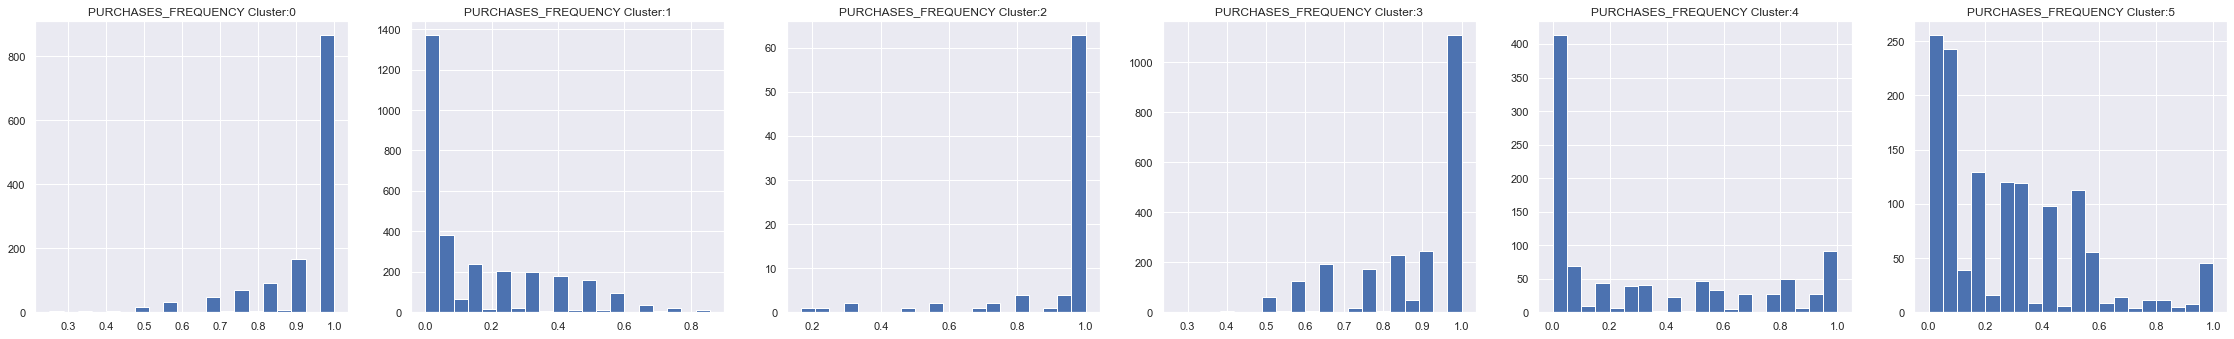

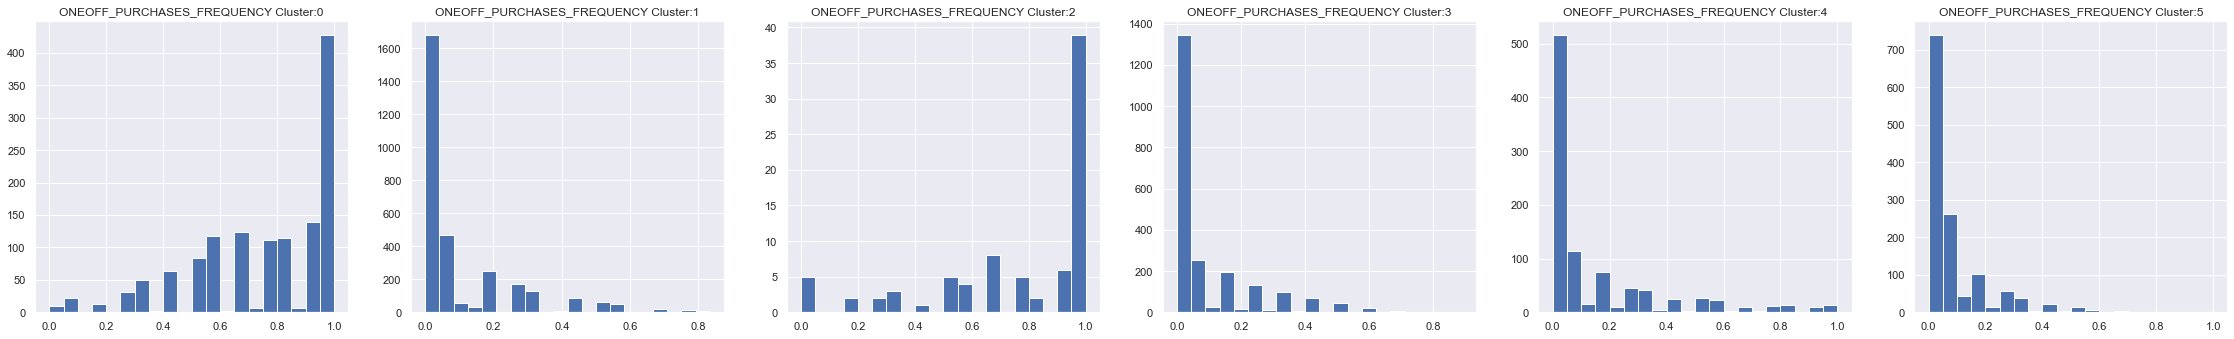

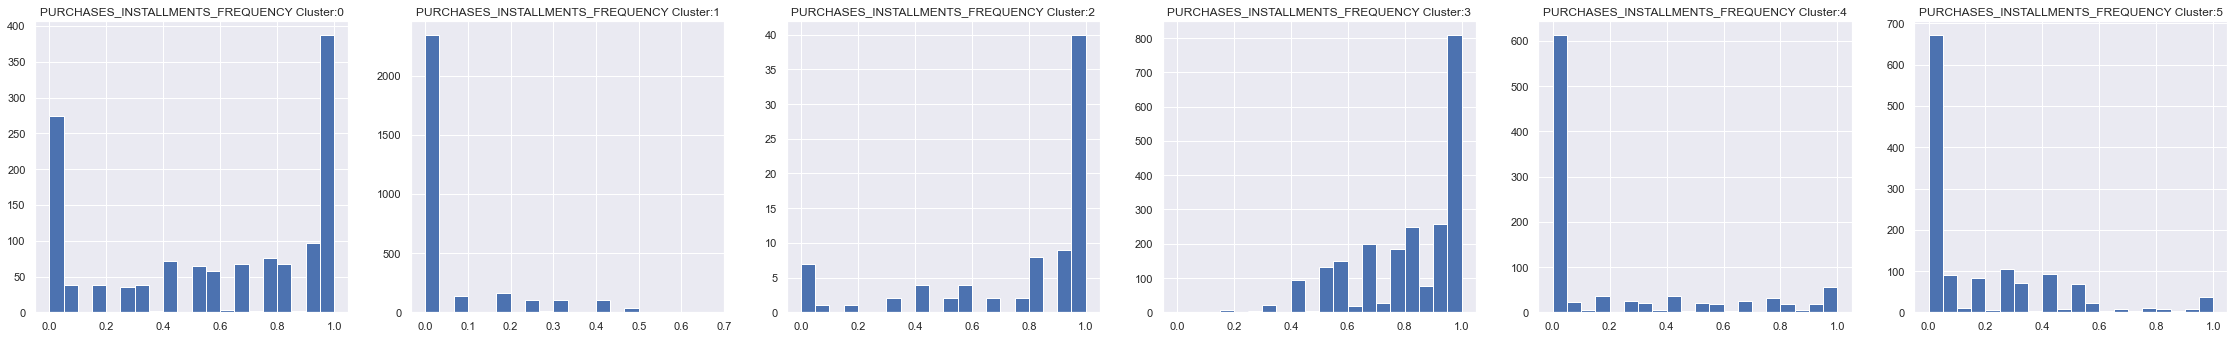

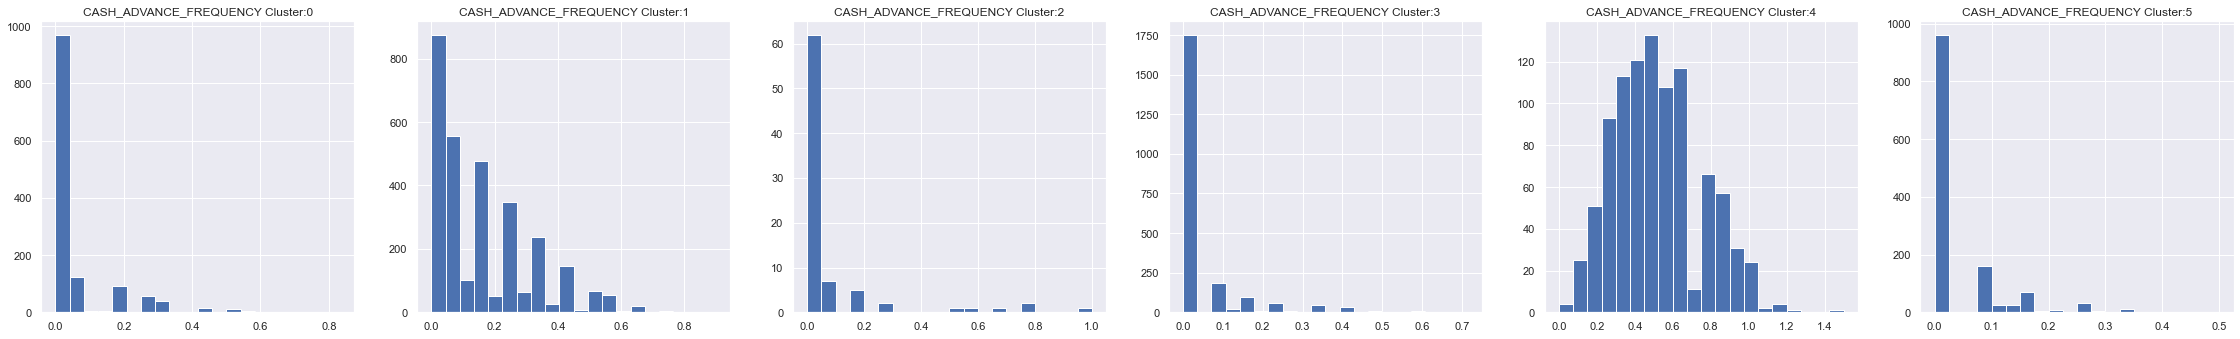

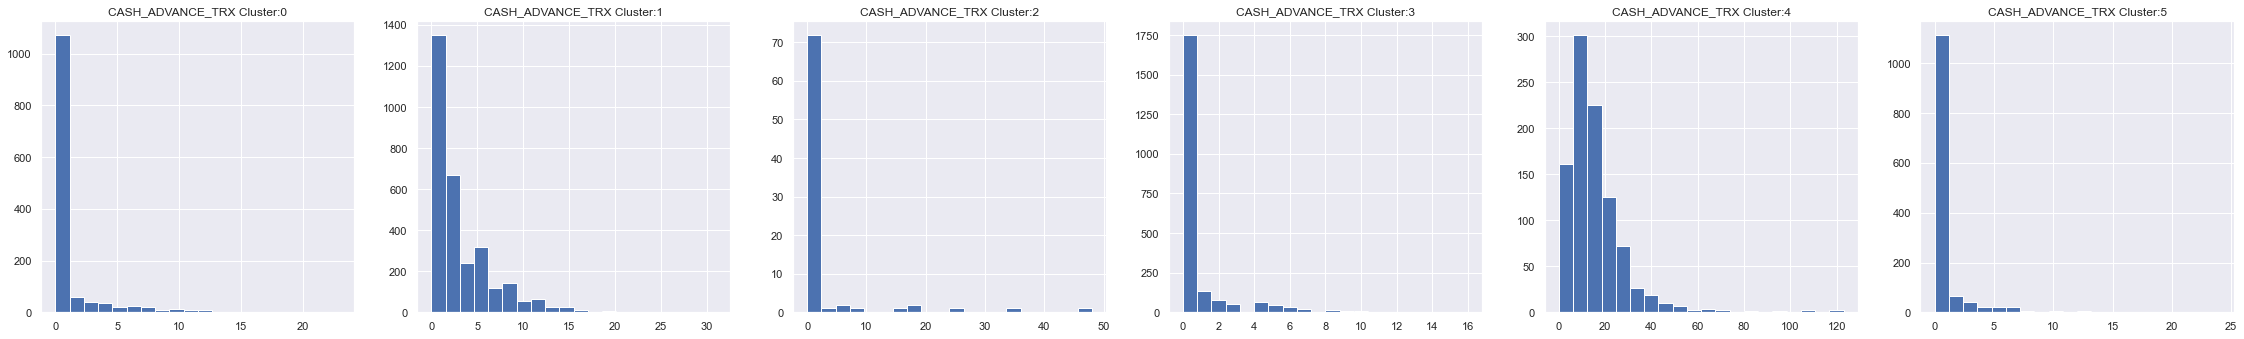

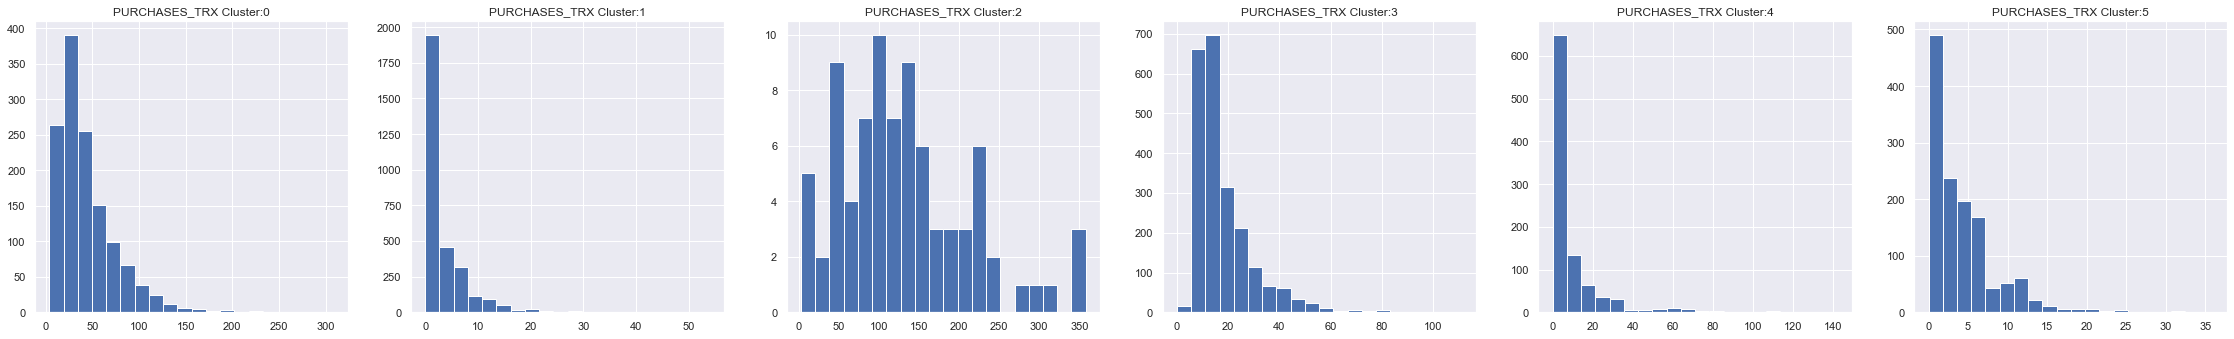

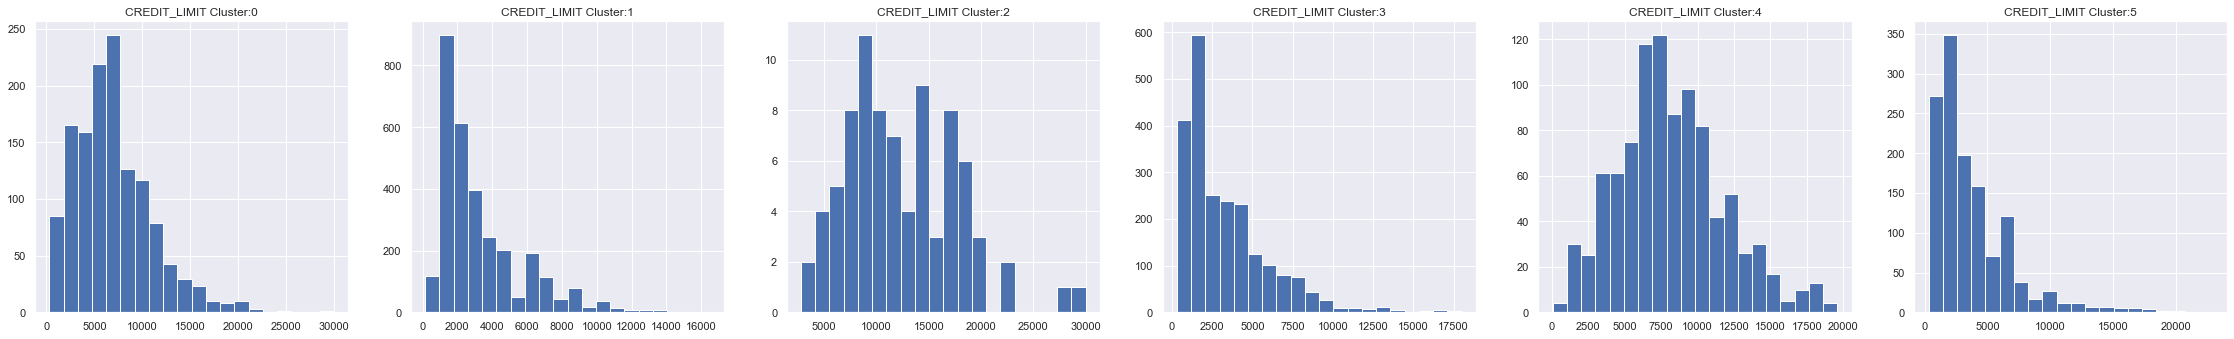

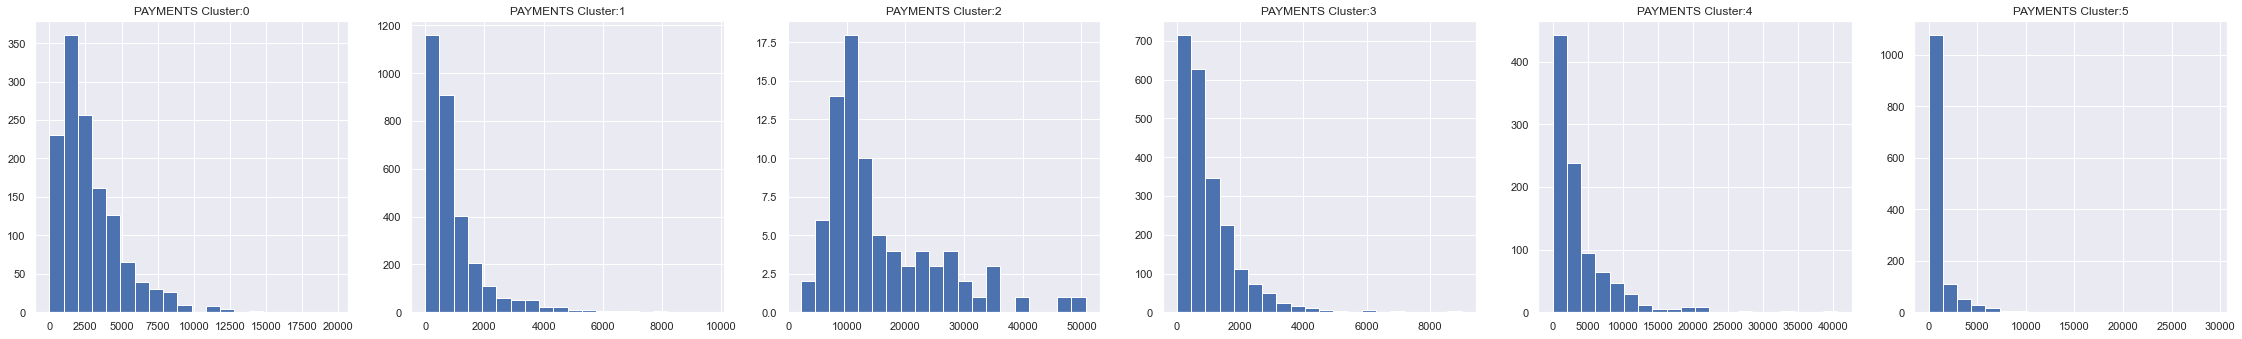

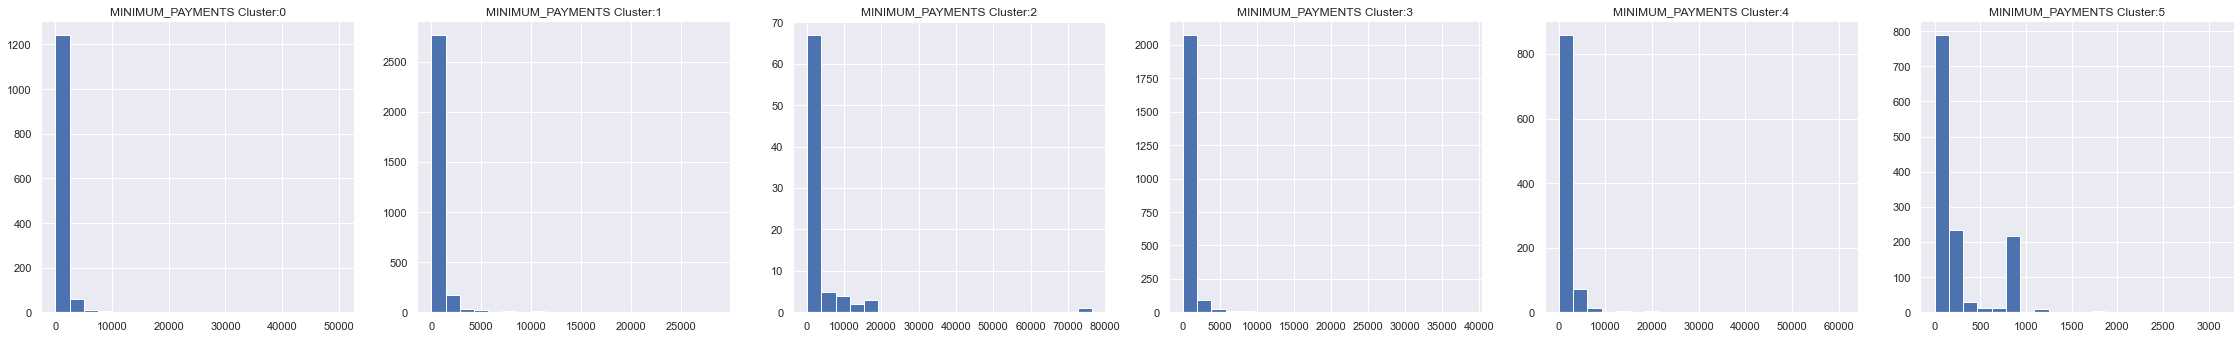

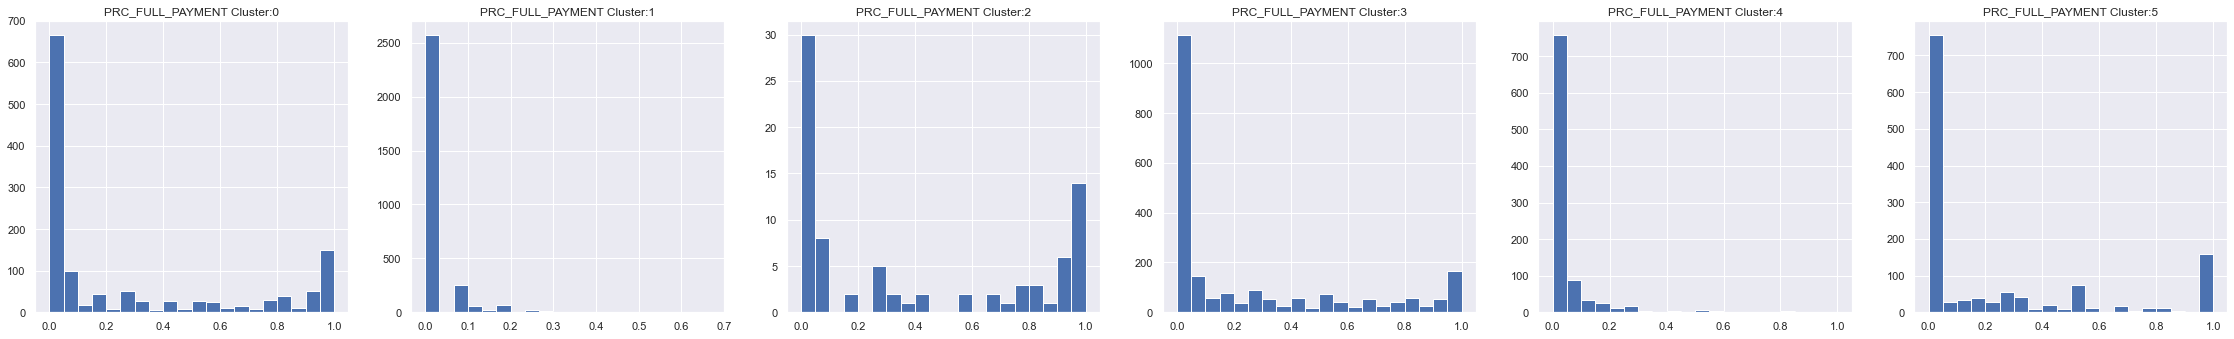

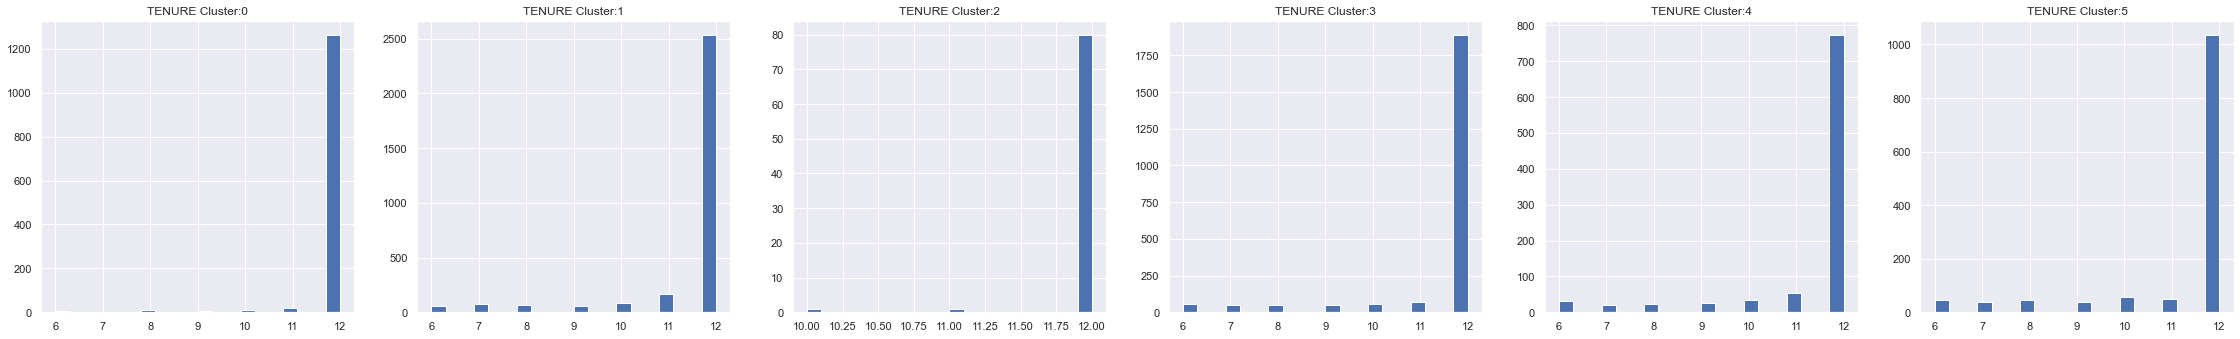

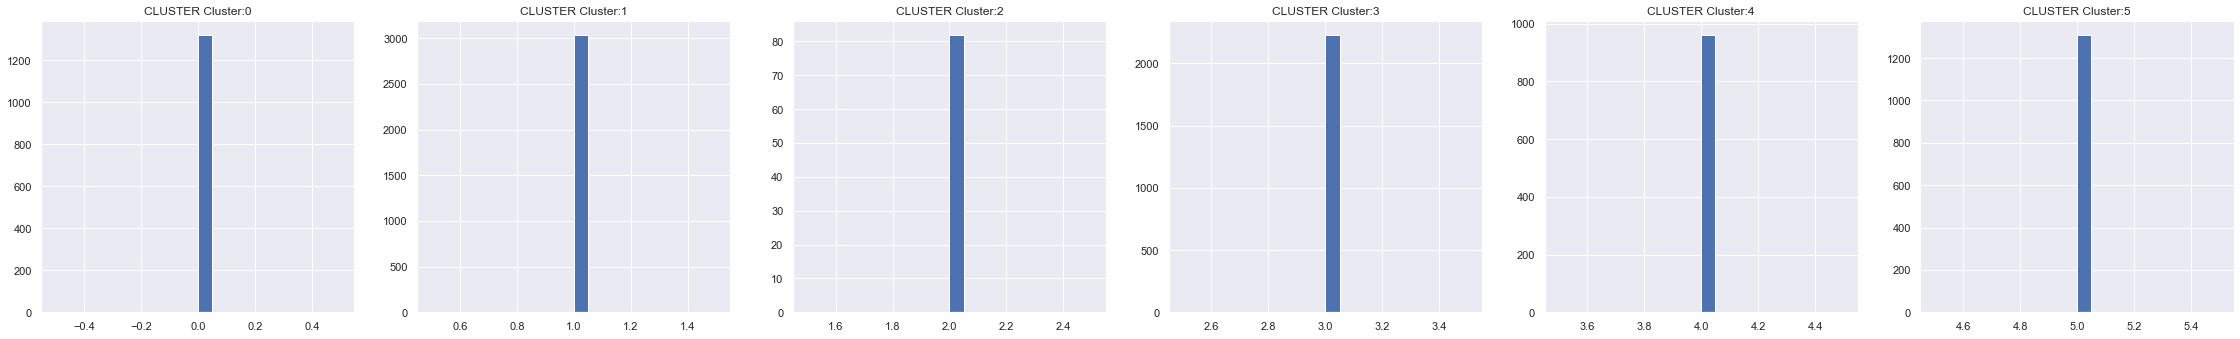

In [26]:
# Visualisation the distribution of each cluster in each column
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(6):
        plt.subplot(1,6,j+1)
        clust = df[df['CLUSTER'] == j]
        clust[i].hist(bins=20)
        plt.title(str(i)+' Cluster:'+str(j))
    plt.show()

### 4.2 Classification of customers

In this section, I will try to adjust a classifier that will classify customers in the different client categories, that were created in the previous section. I will test several classification model implemented in sickit-learn.

In [8]:
# Saving it to pickle
# df.to_pickle('./df.pkl')
df = pd.read_pickle('./df.pkl')

In [9]:
# Train - Test set
X = np.array(df.iloc[:,:-1])
Y = np.array(df.iloc[:,-1])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [10]:
# Scaling the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Confusion matrix function from the [sklearn documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html):

In [16]:
# Function for plotting confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Learning curve function from the [sklearn documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-).

In [17]:
# function for plotting learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#### 4.2.1 Support Vector Machine Classifier

In [6]:
# Grid search for finding the best parameters.
classifier = SVC()

parameters = [{'C':[0.25,0.5,0.75,1],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs = -1)

In [18]:
# fit the data
grid_search.fit(X_train_scaled,Y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [19]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f} %'.format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 97.09 %
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [20]:
# predicting the data
y_pred = grid_search.predict(X_test_scaled)

Confusion matrix, without normalization


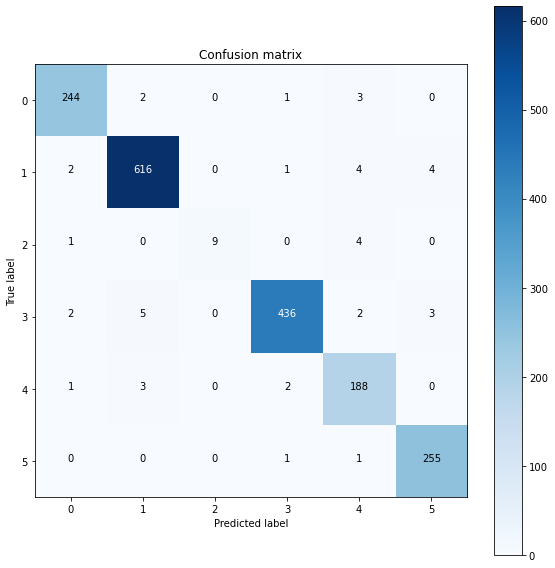

In [22]:
# plotting the confusion matrix
class_names = [i for i in range(6)]
cnf_matrix = confusion_matrix(Y_test, y_pred) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')

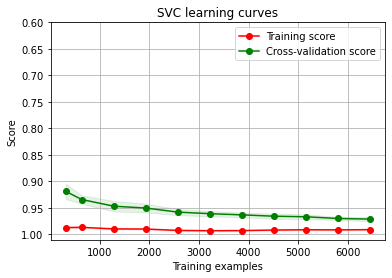

In [23]:
# plotting the learning curve
g = plot_learning_curve(grid_search.best_estimator_,
                        "SVC learning curves", X_train_scaled, Y_train, ylim = [1.01, 0.6],
                        cv = 10,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

In [6]:
# Save model
# joblib.dump(grid_search, './models/SVM_model.pkl')
# Load model
model_svm = joblib.load("./models/SVM_model.pkl")

In the learning curve, we can see from the training score (red line), that the model has a low bias, because it has a great accuracy on the training set, and also on the test set. Therefore we can say, that the model has a low variance as well. Overall a model with low bias and low variance is an optimal one.

#### 4.2.2 Logistic regression

In [24]:
# Grid search for finding the best parameters
lr = LogisticRegression()

parameters = [{'C':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}]

grid_search_lr = GridSearchCV(estimator=lr,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs = -1)

In [25]:
# fit the data
grid_search_lr.fit(X_train_scaled,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                                0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9,
                                0.95, 1]}],
             scoring='accuracy')

In [26]:
best_accuracy = grid_search_lr.best_score_
best_parameters = grid_search_lr.best_params_

print('Best Accuracy: {:.2f} %'.format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 98.94 %
Best Parameters: {'C': 1}


In [27]:
# predicting the data
y_pred = grid_search_lr.predict(X_test_scaled)

Confusion matrix, without normalization


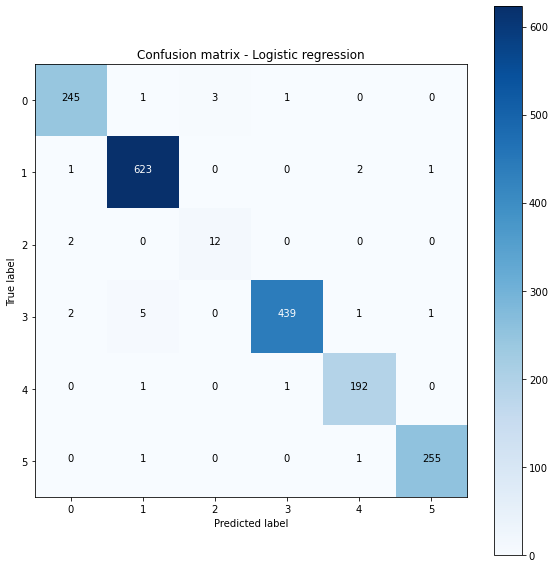

In [28]:
# plotting the confusion matrix
class_names = [i for i in range(6)]
cnf_matrix = confusion_matrix(Y_test, y_pred) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix - Logistic regression')

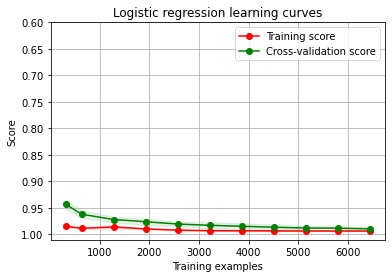

In [29]:
# plotting the learning curve
g = plot_learning_curve(grid_search_lr.best_estimator_,
                        "Logistic regression learning curves", X_train_scaled, Y_train, ylim = [1.01, 0.6],
                        cv = 10,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

In [7]:
# Save model
# joblib.dump(grid_search_lr, './models/LogisticRegression_model.pkl')
# Load model
model_lr = joblib.load("./models/LogisticRegression_model.pkl")

#### 4.2.3 k-Nearest Neighbors

In [30]:
# Grid search for finding the best parameters

knn = KNeighborsClassifier()

parameters = [{'n_neighbors': np.arange(1,20,1)}]

grid_search_knn = GridSearchCV(estimator=knn,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs = -1)

In [31]:
# fit the data
grid_search_knn.fit(X_train_scaled,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}],
             scoring='accuracy')

In [32]:
best_accuracy = grid_search_knn.best_score_
best_parameters = grid_search_knn.best_params_

print('Best Accuracy: {:.2f} %'.format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 94.64 %
Best Parameters: {'n_neighbors': 9}


In [33]:
# predicting the data
y_pred = grid_search_knn.predict(X_test_scaled)

Confusion matrix, without normalization


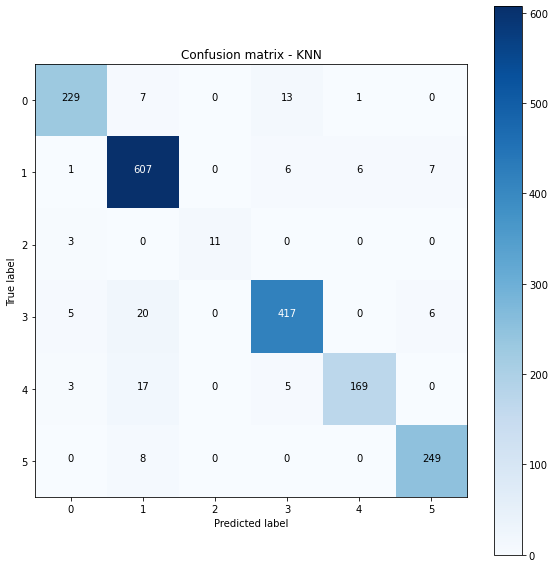

In [34]:
# plotting the confusion matrix
class_names = [i for i in range(6)]
cnf_matrix = confusion_matrix(Y_test, y_pred) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix - KNN')

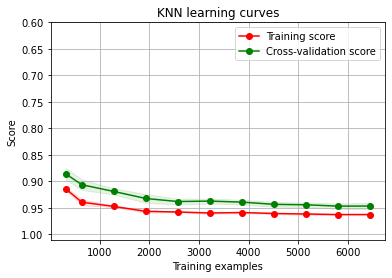

In [35]:
# plotting the learning curve
g = plot_learning_curve(grid_search_knn.best_estimator_,
                        "KNN learning curves", X_train_scaled, Y_train, ylim = [1.01, 0.6],
                        cv = 10,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

In [8]:
# Save model
# joblib.dump(grid_search_knn, './models/KNN_model.pkl')
# Load model
model_knn = joblib.load("./models/KNN_model.pkl")

#### 4.2.4 Decision Tree

In [11]:
# Grid search for finding the best parameters

decisiontree = DecisionTreeClassifier()

parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}]

grid_search_tree = GridSearchCV(estimator=decisiontree,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs = -1)

In [12]:
# fit the data
grid_search_tree.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_features': ['sqrt', 'log2']}],
             scoring='accuracy')

In [13]:
best_accuracy = grid_search_tree.best_score_
best_parameters = grid_search_tree.best_params_

print('Best Accuracy: {:.2f} %'.format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 89.69 %
Best Parameters: {'criterion': 'entropy', 'max_features': 'log2'}


In [14]:
# predicting the data
y_pred = grid_search_tree.predict(X_test)

Confusion matrix, without normalization


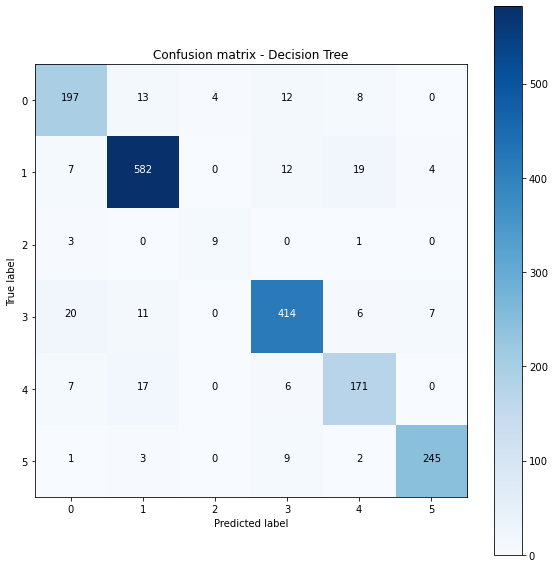

In [18]:
# plotting the confusion matrix
class_names = [i for i in range(6)]
cnf_matrix = confusion_matrix(Y_test, y_pred) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix - Decision Tree')

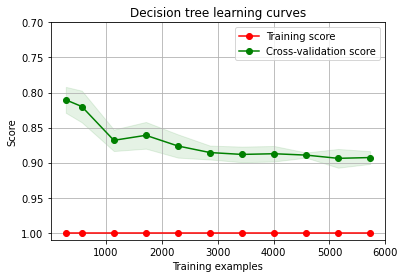

In [19]:
# plotting the learning curve
g = plot_learning_curve(grid_search_tree.best_estimator_, "Decision tree learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [9]:
# Save model
# joblib.dump(grid_search_tree, './models/DecisionTree_model.pkl')
# Load model
model_decisiontree = joblib.load("./models/DecisionTree_model.pkl")

#### 4.2.5 Random Forest

In [42]:
# Grid search for finding the best parameters
rf = RandomForestClassifier()

parameters = [{'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}]

grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs = -1)

In [43]:
# fit the data
grid_search_rf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [20, 40, 60, 80, 100]}],
             scoring='accuracy')

In [44]:
best_accuracy = grid_search_rf.best_score_
best_parameters = grid_search_rf.best_params_

print('Best Accuracy: {:.2f} %'.format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 95.66 %
Best Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 80}


In [45]:
# predicting the data
y_pred = grid_search_rf.predict(X_test)

Confusion matrix, without normalization


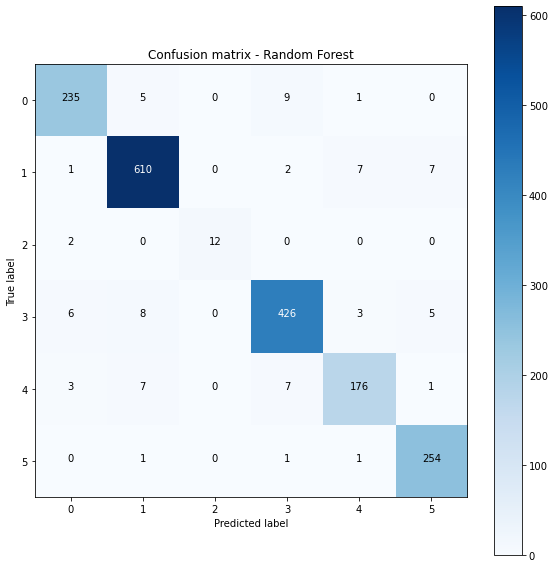

In [46]:
# plotting the confusion matrix
class_names = [i for i in range(6)]
cnf_matrix = confusion_matrix(Y_test, y_pred) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix - Random Forest')

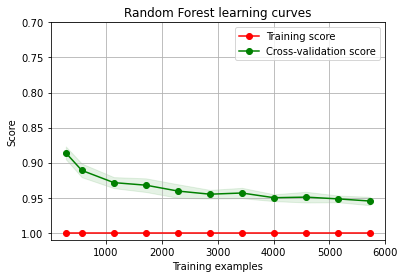

In [47]:
# plotting the learning curve
g = plot_learning_curve(grid_search_rf.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [11]:
# Save model
# joblib.dump(grid_search_rf, './models/RandomForest_model.pkl')
# Load model
model_rf = joblib.load("./models/RandomForest_model.pkl")

#### 4.2.6 XGBoost

In [48]:
# Grid search for finding the best parameters

xgb = XGBClassifier()

accuracies = cross_val_score(estimator=xgb, X = X_train_scaled, y = Y_train, cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

[15:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [49]:
# fit the data
xgb.fit(X_train_scaled, Y_train)

[15:40:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
# predicting the data
y_pred = xgb.predict(X_test_scaled)

Confusion matrix, without normalization


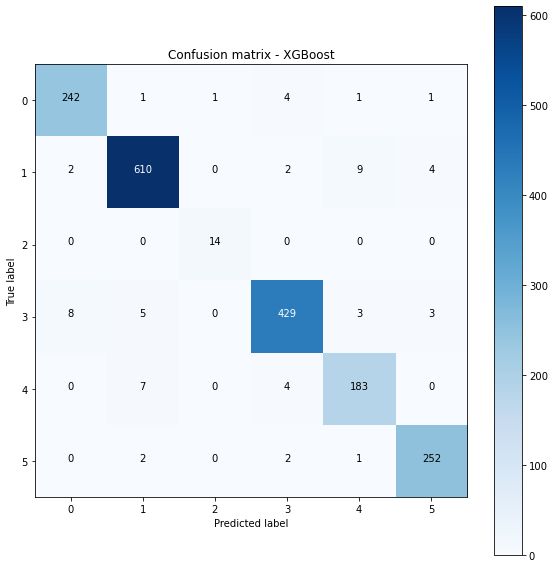

In [51]:
# plotting the confusion matrix
class_names = [i for i in range(6)]
cnf_matrix = confusion_matrix(Y_test, y_pred) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix - XGBoost')

In [12]:
# Save model
#with open('./models/XGBoost_model.pkl', 'wb') as file:
#    pickle.dump(xgb, file)

# Load from file
with open('./models/XGBoost_model.pkl', 'rb') as file:
    model_xgb = pickle.load(file)

#### 4.2.7 Voting Classifier

In [75]:
# Saving each model best parameters
rf_best  = RandomForestClassifier(**grid_search_rf.best_params_)
svm_best = SVC(**grid_search.best_params_)
xgb_best = XGBClassifier(xgb)
tr_best  = DecisionTreeClassifier(**grid_search_tree.best_params_)
knn_best = KNeighborsClassifier(**grid_search_knn.best_params_)
lr_best  = LogisticRegression(**grid_search_lr.best_params_)

In [76]:
# Creating a voting classifier (ensemble technique)
voting_classifier = VotingClassifier(estimators=[('rf',rf_best),('xgb',xgb_best),('svm',svm_best),('tr',tr_best),('knn',knn_best),('lr',lr_best)])

In [77]:
# fit the data
voting_classifier = voting_classifier.fit(X_train_scaled,Y_train)

[15:54:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objective__base_score", "objective__booster", "objective__colsample_bylevel", "objective__colsample_bynode", "objective__colsample_bytree", "objective__gamma", "objective__gpu_id", "objective__importance_type", "objective__interaction_constraints", "objective__learning_rate", "objective__max_delta_step", "objective__max_depth", "objective__min_child_weight", "objective__missing", "objective__monotone_constraints", "objective__n_estimators", "objective__n_jobs", "objective__num_parallel_tree", "objective__objective", "objective__random_state", "objective__reg_alpha", "objective__reg_lambda", "objective__subsample", "objective__tree_method", "objective__use_label_encoder", "objective__validate_parameters" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not 

In [152]:
# predicting the data
y_pred = voting_classifier.predict(X_test_scaled)

In [153]:
print("Accuracy: {:.2f} % ".format(100*accuracy_score(Y_test, y_pred)))

Accuracy: 99.50 % 


Confusion matrix, without normalization


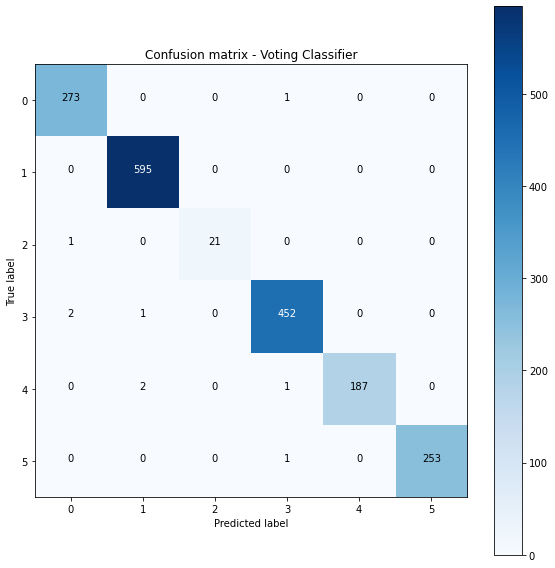

In [154]:
# plotting the confusion matrix
class_names = [i for i in range(6)]
cnf_matrix = confusion_matrix(Y_test, y_pred) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix - Voting Classifier')

#### Model Summary:

In [151]:
classifiers = [(grid_search, 'Support Vector Machine'),
                (grid_search_lr, 'Logostic Regression'),
                (grid_search_knn, 'k-Nearest Neighbors'),
                (grid_search_tree, 'Decision Tree'),
                (grid_search_rf, 'Random Forest'),
                (xgb, 'XGBoost'),
                (voting_classifier, 'Voting Classifier')]

print('MODEL SUMMARY')
for clf, label in classifiers:
    if label != 'XGBoost' and label != 'Voting Classifier':
        print(30*'_', '\n{}'.format(label))
        print('Best Accuracy: {:.2f} %'.format(100*clf.best_score_))
    else:
        if label == 'XGBoost':
            y_pred = xgb.predict(X_test_scaled)
        else:
            y_pred = voting_classifier.predict(X_test_scaled)
        print(30*'_', '\n{}'.format(label))
        print('Best Accuracy: {:.2f} %'.format(100*accuracy_score(Y_test,y_pred)))

MODEL SUMMARY
______________________________ 
Support Vector Machine
Best Accuracy: 97.09 %
______________________________ 
Logostic Regression
Best Accuracy: 98.94 %
______________________________ 
k-Nearest Neighbors
Best Accuracy: 94.64 %
______________________________ 
Decision Tree
Best Accuracy: 89.83 %
______________________________ 
Random Forest
Best Accuracy: 95.66 %
______________________________ 
XGBoost
Best Accuracy: 96.70 %
______________________________ 
Voting Classifier
Best Accuracy: 99.50 %


## 5. Deployment
----

The goal of building a machine learning model is to solve a problem, and a machine learning model can only do so when it is in production and actively in use by users. Therefore, model deployment is as important as model building.
There are several approaches, that a model can be deployed, I will mention 2 of them in this section:


**a) Serving the model via REST API:**
<br>

One of the most used tool for this method is Flask. Flask is a framework, which main task is to build web based applications. 

A REST API transfers to the client the state of a requested resource. In our case, the requested resource will be a prediction from our Machine Learning Model. Therefore, our server will be passing the predictions to a client of which may be anything from a web app to a mobile device.

Basically, with the help of Flask, we will be able to send the predicted value of the model, into the frontend application.

**b) Deploying to PaaS (for instance Heroku):**
<br>

Heroku is a Platform as a service tool that allows developers to host their serverless code. What this means is that one can develop scripts to serve one or the other for specific purposes. The Heroku platform is itself hosted on AWS (Amazon Web Services), which is an infrastructure as a service tool.

Basically, if we developed for instance a web based solution, we can host it in the cloud with the help of Heroku. Heroku requires a list of all dependencies required by our application, and also the trained model in an exported format (pickle).Heroku also demands another file known as Procfile that is used to specify the entry point of the app.

If all the preparation is done, we just have to create an account on Heroku, connect it into our GitHub account, choose the specific repo which contains all the necessary files (server code, model.pkl, requirements.txt, and Procfile).